## Histogram of Oriented Gradients

- http://stackoverflow.com/questions/6090399/get-hog-image-features-from-opencv-python
- http://www.juergenwiki.de/work/wiki/doku.php?id=public:hog_descriptor_computation_and_visualization

(519L, 778L)


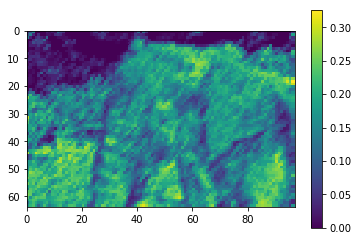

ran


In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('images/elephant.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print gray.shape

cv2.imshow('image', image)
cv2.waitKey(0)

cellSize = (8,8)
blockSize = (2,2)

nbins = 9

hog = cv2.HOGDescriptor(_winSize=(gray.shape[1] // cellSize[1] * cellSize[1],gray.shape[0] // cellSize[0] * cellSize[0]),
                        _blockSize=(blockSize[1] * cellSize[1],blockSize[0] * cellSize[0]),
                        _blockStride=(cellSize[1], cellSize[0]),
                        _cellSize=(cellSize[1], cellSize[0]),
                        _nbins=nbins)

n_cells = (gray.shape[0]//cellSize[0], gray.shape[1]//cellSize[1])

hog_feats = hog.compute(gray).reshape(n_cells[1] - blockSize[1] + 1,
                        n_cells[0] - blockSize[0] + 1,
                        blockSize[0], blockSize[1], nbins).transpose((1, 0, 2, 3, 4)) 

# Create our gradients array with nbin dimensions to store gradient orientations 
gradients = np.zeros((n_cells[0], n_cells[1], nbins))                                      


cell_count = np.full((n_cells[0], n_cells[1],1),0,dtype=int)

for offY in range(blockSize[0]):
    for offX in range(blockSize[1]):
        gradients[offY:n_cells[0] - blockSize[0]+offY+1, offX:n_cells[1] - blockSize[1]+offX+1] +=\
        hog_feats[:, :, offY, offX, :]
        cell_count[offY:n_cells[0]-blockSize[0]+offY+1, offX:n_cells[1]-blockSize[1]+offX+1]+=1


gradients = gradients/cell_count        

color_bins = 5
plt.pcolor(gradients[:,:, color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable = 'box')
plt.colorbar()
plt.show()

print 'ran'
cv2.destroyAllWindows()